## Data set analysis

In [244]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
import math
import seaborn as sns
import data_preprocessing as proc
import visualisations as vis
import networkx as nx
from igraph import *
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [245]:
#Take only 'shelves' with minimum 200 usages in all data set
limit_of_tag_frequency = 200
df, shelves = proc.get_all_data(limit_of_tag_frequency)

/home/janek/.local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2669 non-null   int64  
 1   TITLE       2669 non-null   object 
 2   YEAR        2669 non-null   object 
 3   RATE        2669 non-null   float64
 4   PAGES       2669 non-null   object 
 5   POPULARITY  2669 non-null   int64  
 6   AUTHOR      2669 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 166.8+ KB


In [247]:
df.head()

ID  \
0  1000   
2  1003   
3  1004   
4  1005   
5  1006   

                                                                                       TITLE  \
0        Millionaire Women Next Door: The Many Journeys of Successful American Businesswomen   
2                     The Millionaire Next Door: The Surprising Secrets of America's Wealthy   
3                                                                        Think and Grow Rich   
4  Think and Grow Rich: The Landmark Bestseller Now Revised and Updated for the 21st Century   
5                                                                       Think and Grow Rich!   

   YEAR  RATE PAGES  POPULARITY             AUTHOR  
0  2004  3.88   320         631  Thomas J. Stanley  
2  1998  4.03   258          15  Thomas J. Stanley  
3  2001  4.18   345          36      Napoleon Hill  
4  2005  4.18   320       91373      Napoleon Hill  
5  2004  4.18   412         330      Napoleon Hill

In [248]:
df.describe(include='all')

ID             TITLE  YEAR         RATE PAGES  \
count     2669.000000              2669  2669  2669.000000  2669   
unique            NaN              2669    72          NaN   553   
top               NaN  El último lector  None          NaN  None   
freq              NaN                 1   441          NaN   557   
mean     38970.913076               NaN   NaN     3.805388   NaN   
std      46237.774434               NaN   NaN     0.685363   NaN   
min       1000.000000               NaN   NaN     0.000000   NaN   
25%       2174.000000               NaN   NaN     3.660000   NaN   
50%      10252.000000               NaN   NaN     3.920000   NaN   
75%     100472.000000               NaN   NaN     4.110000   NaN   
max     101796.000000               NaN   NaN     5.000000   NaN   

          POPULARITY        AUTHOR  
count   2.669000e+03          2669  
unique           NaN          1714  
top              NaN  Stephen King  
freq             NaN            29  
mean    7.541488e+03           NaN  
std     6.233402e+04           NaN  
min     0.000000e+00           NaN  
25%     7.000000e+00           NaN  
50%     4.200000e+01           NaN  
75%     3.250000e+02           NaN  
max     1.538774e+06           NaN

In [379]:
df, shelves = proc.get_all_data(100)
all_tags = []
for key, value in shelves.items():
    all_tags += value
print(set(all_tags))
print("how many books: " + str(len(shelves.items())))    
print("how many usages of all tags [with duplicates]: " + str(len(all_tags)))
print("how many unique tags: " + str(len(set(all_tags))))

/home/janek/.local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


{'classics-to-read', 'finance', 'essays', 'war', 'art', 'adult-fiction', 'political', 'for-school', 'high-school', 'business', 'series', 'science-fiction', 'novel', 'classical-studies', 'self-help', 'school-books', 'nonfic', 'work', 'personal-development', 'classic-literature', 'poetry', 'non-fiction', 'young-adult', 'economics', 'paperback', 'childrens', 'humour', 'greek', 'british', 'adult', 'american-history', 'drama', 'childhood', 'ancient', 'novels', 'spiritual', 'mythology', 'spirituality', 'america', 'thriller', 'literary', 'leadership', 'travel', 'american-literature', 'university', 'classic', 'politics', 'memoirs', 'history', 'home', 'non-fic', 'to-read-nonfiction', 'kids', '20th-century', 'comedy', 'children-s-books', 'childrens-books', 'historical', 'mystery', 'sci-fi-fantasy', 'short-stories', 'romance', 'self-improvement', 'religion', 'usa', 'historical-fiction', 'college', 'ancient-greece', 'educational', 'literary-fiction', 'horror', 'crime', 'anthology', 'sci-fi', 'wome

In [466]:
data_arr = df.values
columns = list(zip(*data_arr))

authors = columns[-1]
years = columns[-5]
years_disc = vis.discretize_data([int(i) for i in columns[-5] if i != "None"])
pages= vis.discretize_data([int(i) for i in columns[-3] if i != "None"])
rates = vis.discretize_data(columns[-4])
popularity= vis.discretize_data(columns[-2], strategy = "quantile")

[array([1888. , 1913.8, 1939.6, 1965.4, 1991.2, 2017. ])]
[array([   0. ,  566.4, 1132.8, 1699.2, 2265.6, 2832. ])]
[array([0., 1., 2., 3., 4., 5.])]
[array([0.000000e+00, 5.000000e+00, 2.000000e+01, 8.300000e+01,
       6.130000e+02, 1.538774e+06])]


In [381]:
mylayout={
    0:"circular", #circular layout
    1:"fr", #layout_fruchterman_reingold
    2:"grid_fr", #layout_grid_fruchterman_reingold
    3: "kk", #layout_kamada_kawai
    4: "lgl", #layout_lgl
    5: "Bipartite" # Bipartite layout - only for Bipartites
}

## Visualisations

For visualisations we used igraph library.
Below we present the graph, where the edge means, that two connected books have the same author.
<br>Parameters:
- degree -> Mimnium node degree, to be shown in the graph. It corresponds with minimum ammount of books written by single author.
- use_layout -> Layout, that will be used to visualise graph (best 0,2 - circular, grid_fruchterman_reingold)

In [253]:
#Parameters
degree = 7
use_layout = mylayout[0]

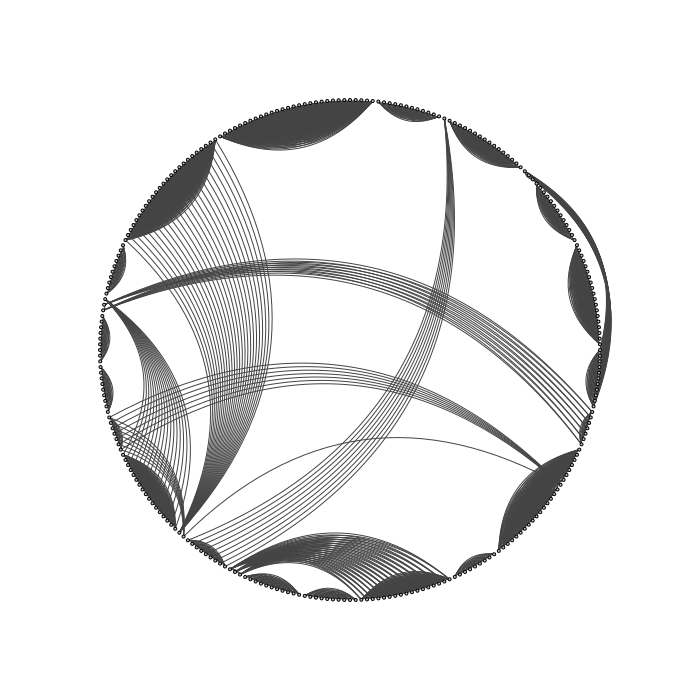

In [382]:
g, visual_style = vis.visualise_normal_graph(authors, degree, use_layout)
plot(g, **visual_style)

The other way to visualise that, is to add 'authors' to graph as nodes, and then create bipartite network, where each book is connected to one author.
<br>Parameters:
- how_many -> How many top authors should be visualised.
- use_layout -> Layout, that will be used to visualise graph (best 1 - fruchterman_reingold, 5 - Bipartite)

In [383]:
#Parameters
how_many = 10
use_layout = mylayout[1]

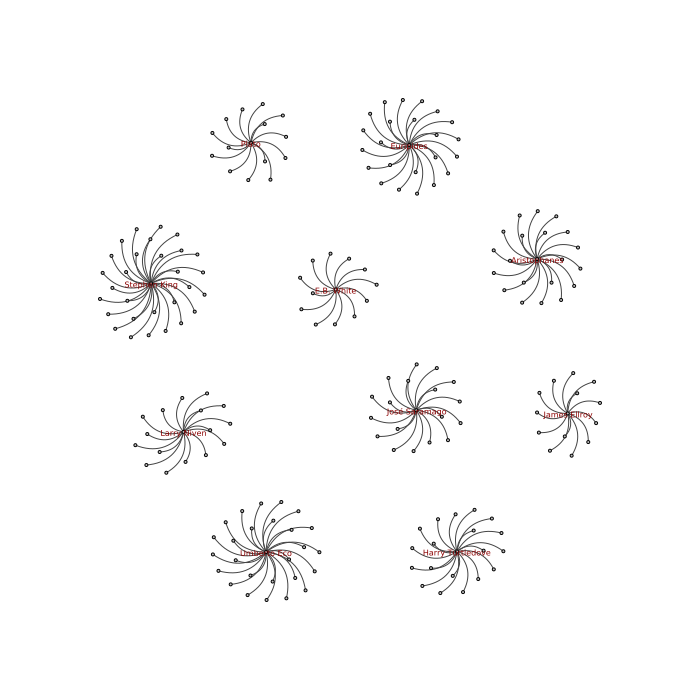

In [385]:
g, visual_style = vis.visualise_binomials(df,authors,"AUTHOR", how_many, use_layout)
plot(g, **visual_style)

Below there is visualisation that shows, when books were published.
<br>Parameters:
- how_many -> How many most frequent years should be visualised
- use_layout -> Layout, that will be used to visualise graph (best 1 - fruchterman_reingold, 5 - Bipartite)
- discretized -> Decides, if year should be discretized into 5 bins (1888. , 1913.8, 1939.6, 1965.4, 1991.2, 2017)

In [416]:
#Parameters
how_many = 50
use_layout = mylayout[2]
discretized = False

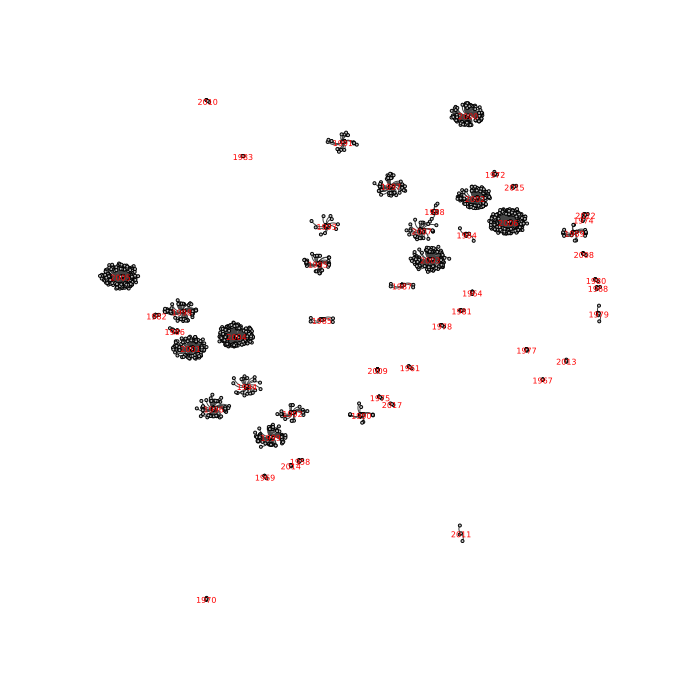

In [417]:
if discretized:
    g, visual_style = vis.visualise_binomials(df,years_disc,"None", how_many, use_layout)
else:
    g, visual_style = vis.visualise_binomials(df,years,"YEAR", how_many, use_layout)

plot(g, **visual_style)

That visualisations shows relation between tags and books.
<br>Parameters:
- tag_limit -> set up minimal frequency of tag in the entire data set, to be considered as node
- how_many_books -> set up ammount of books to be presented on the graph 
- use_layout -> Layout, that will be used to visualise graph (best 1 - fruchterman_reingold, 5 - Bipartite)

In [465]:
#Parameters
tag_limit = 400
how_many_books = 100
use_layout = mylayout[5]

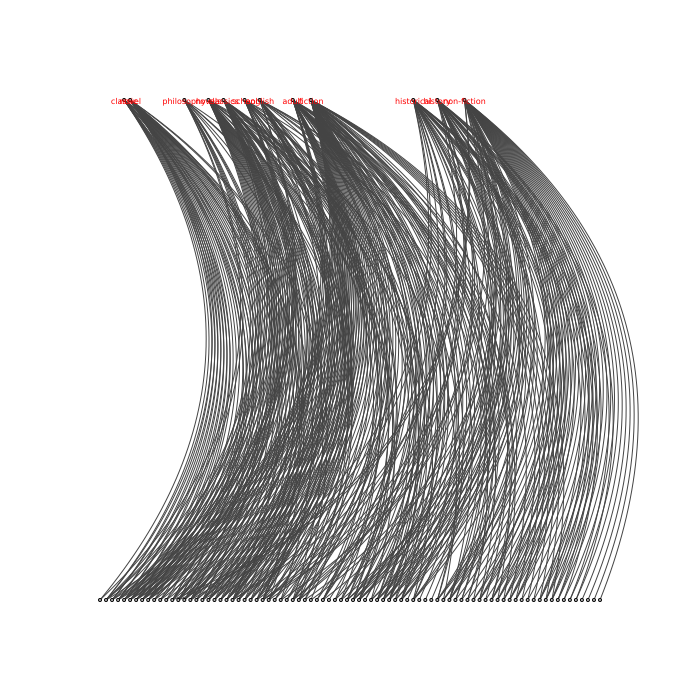

In [464]:
g, visual_style = vis.visualise_tags_binomial(tag_limit, use_layout, how_many_books)
plot(g, **visual_style)

Below there is visualisation that shows, how books were rated (1,2,3,4,5).
<br>Parameters:
- use_layout -> Layout, that will be used to visualise graph (best 1 - fruchterman_reingold, 5 - Bipartite)

In [436]:
#Parameters
use_layout = mylayout[1]

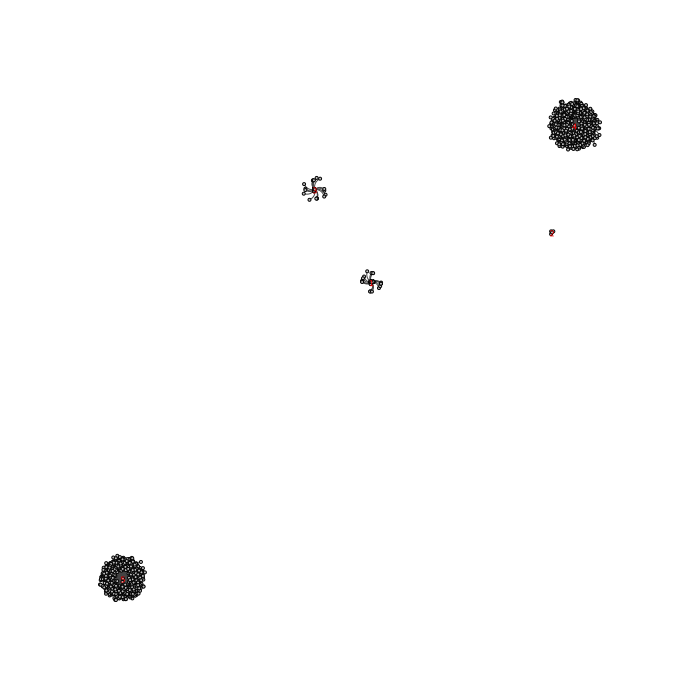

In [437]:
g, visual_style = vis.visualise_binomials(df,rates,"None", -1, use_layout)
plot(g, **visual_style)

Below there is visualisation that shows popularity of books. Popularity is discretized by the following bins: <br>[0, 5, 20, 83, 613, 1538774] 
<br>Parameters:
- use_layout -> Layout, that will be used to visualise graph (best 1 - fruchterman_reingold, 5 - Bipartite)

In [469]:
#Parameters
use_layout = mylayout[5]

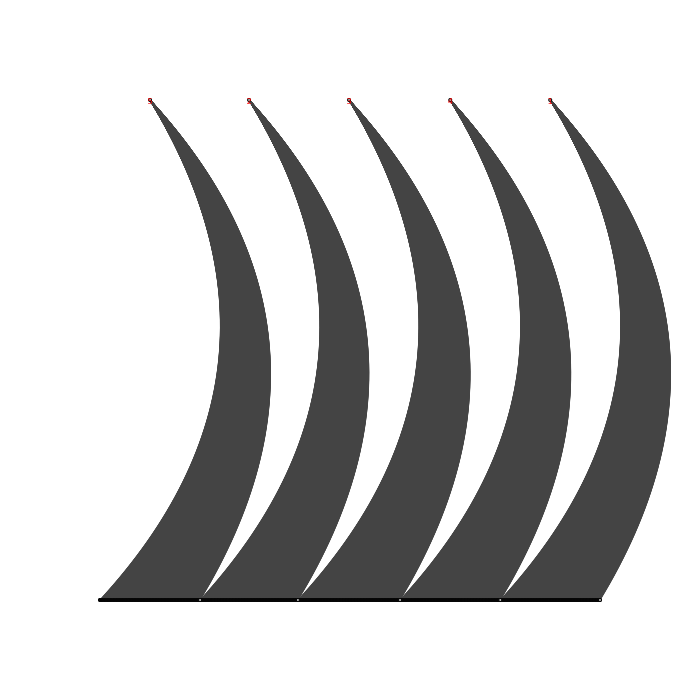

In [471]:
g, visual_style = vis.visualise_binomials(df,popularity,"None", -1, use_layout)
plot(g, **visual_style)

Below there is visualisation that shows size of books. Page ammount is discretized by the following bins: <br>[   0. ,  566.4, 1132.8, 1699.2, 2265.6, 2832. ]
<br>Parameters:
- use_layout -> Layout, that will be used to visualise graph (best 1/2 - fruchterman_reingold, 5 - Bipartite)

In [442]:
#Parameters
use_layout = mylayout[2]

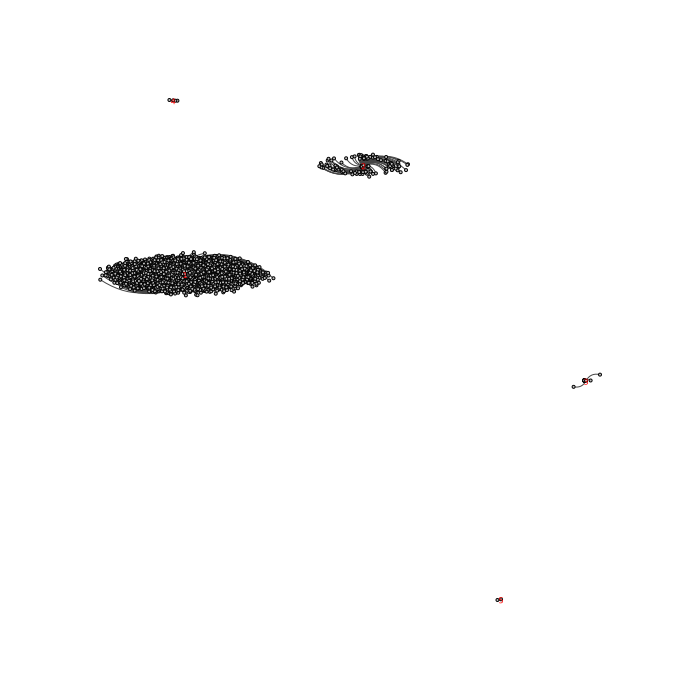

In [443]:
g, visual_style = vis.visualise_binomials(df,pages,"None", -1, use_layout)

plot(g, **visual_style)

In [499]:
authors = columns[-1]
years = vis.discretize_data([int(i) if i != "None" else -1 for i in columns[-5]])
titles = list(columns[-6])
pages= vis.discretize_data([int(i) if i != "None" else -1 for i in columns[-3]])
rates = vis.discretize_data(columns[-4])
popularity= vis.discretize_data(columns[-2], strategy = "quantile")
size = df.shape[0]
ids = list(columns[0])
matrix_authors = vis.make_feature_matrix(size,authors)
matrix_years = vis.make_feature_matrix(size,years)
matrix_pages = vis.make_feature_matrix(size,pages)
matrix_rates = vis.make_feature_matrix(size,rates)
matrix_popularity = vis.make_feature_matrix(size,popularity)

[array([-1.0000e+00,  4.0260e+02,  8.0620e+02,  1.2098e+03,  1.6134e+03,
        2.0170e+03])]
[array([-1.0000e+00,  5.6560e+02,  1.1322e+03,  1.6988e+03,  2.2654e+03,
        2.8320e+03])]
[array([0., 1., 2., 3., 4., 5.])]
[array([0.000000e+00, 5.000000e+00, 2.000000e+01, 8.300000e+01,
       6.130000e+02, 1.538774e+06])]


In [504]:
tlist = ['Rose Madder','The Eyes of the Dragon', 'Eleven Minutes', 'Twelfth Night',
'The Old Man and the Sea','Misery','A Briefer History of Time','The Universe in a Nutshell',
 "It's Not about the Bike: My Journey Back to Life",
 "The Universe in a Single Atom: The Convergence of Science and Spirituality",
 "In the Name of Jesus: Reflections on Christian Leadership","The Innocents Abroad",
 "To Kill a Mockingbird",
 "Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry",
 "Trump: The Art of the Deal", "Dracula",
 "Preface to the Presidency: Selected Speeches of Bill Clinton 1974-1992",
 "Lysis/Phaedrus/Symposium: Plato on Homosexuality", "Poems New and Collected"]

tlist1 = ['Rose Madder','The Eyes of the Dragon','The Old Man and the Sea','Misery',"To Kill a Mockingbird",
              "Trump: The Art of the Deal", "Dracula","Preface to the Presidency: Selected Speeches of Bill Clinton 1974-1992",]

tlist2 = ['A Briefer History of Time','The Universe in a Nutshell', 
               "In the Name of Jesus: Reflections on Christian Leadership",
              "Poems New and Collected", 'Twelfth Night',
              "Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry",
              "It's Not about the Bike: My Journey Back to Life", 
              "The Universe in a Single Atom: The Convergence of Science and Spirituality", "Misery"]

This graph is showing correlation between books. All nodes are books and every pair has edge (complete graph). darker and widther edge means bigger correlation between books. Thick and  bright edge means small correlaion. 
- tag_limit -> set up minimal frequency of tag in the entire data set, to be considered as node
- how_many -> how many books should be presentend on the graph [only random mode]
- use_layout -> Layout, that will be used to visualise graph [best 0]
- scal -> Set up weight for each attributes, that may be common between two books: author, publish year, book size, book rate, book popularity, shelves
- list of books to show on the grah [if none, then random mode]

In [505]:
#Parameters
tag_limit = 100
how_many = 10
use_layout = mylayout[0]
scal = {"auth":0, "years":2, "pages":0, "rates":0, "popularity":0, "shelves":5}
custom_title_list = tlist2

/home/janek/.local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[array([ 5., 22., 39., 56., 73., 90.])]


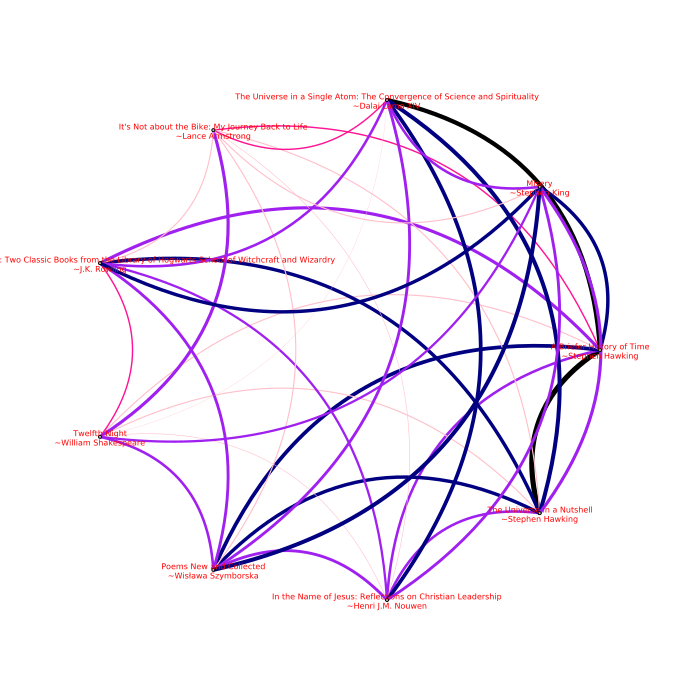

In [502]:
g, visual_style = vis.visualuse_similarity(use_layout, how_many, tag_limit, ids, scal, titles, authors,
                         matrix_authors, matrix_years, matrix_pages,
                         matrix_rates, matrix_popularity, title_list=custom_title_list)

plot(g, **visual_style)

In [477]:
df.sort_values('YEAR')[:1000]

ID  \
1169    2769   
292     1440   
913     2396   
294     1444   
340     1522   
440   100779   
691   101192   
305     1460   
698   101203   
212   100336   
352     1548   
903     2384   
457     1706   
45      1056   
1076    2647   
446     1693   
323     1497   
355     1555   
469     1723   
829   101426   
721     2114   
341     1523   
772     2184   
1077    2649   
266     1392   
210    10379   
1074    2644   
1126    2710   
371     1576   
330     1506   
950   101683   
765   101323   
266    10455   
536   100953   
773     2185   
534   100951   
338     1514   
951   101684   
1102    2681   
916   101603   
1070    2632   
408   100694   
513     1794   
651   101123   
235     1330   
450   100793   
499    10788   
354   100602   
341   100566   
1028    2572   
231     1326   
529   100944   
650   101122   
60      1080   
860     2315   
83    100125   
287   100463   
81      1111   
252     1356   
740   101274   
855   101473   
392     1610   
232   100366   
1120    2702   
136    10241   
1128    2713   
1362    4110   
555   100980   
467     1721   
706     2087   
535    10833   
877   101500   
310    10518   
567     1877   
241   100381   
105   100160   
918     2405   
378    10613   
482     1744   
370     1575   
902     2382   
856   101474   
319    10528   
331     1507   
655   101129   
20    100025   
944   101669   
450     1699   
486   100864   
1010    2550   
188   100290   
869     2330   
349   100595   
1078    2650   
375   100638   
487     1753   
278   100450   
223   100352   
400     1623   
228   100359   
1091    2669   
696     2072   
1073    2638   
882     2348   
675     2030   
768     2177   
262    10445   
468     1722   
872     2335   
618   101068   
12     10018   
289   100466   
1205    2816   
185     1258   
977   101731   
1123    2706   
858     2313   
401     1624   
288    10488   
1226    2846   
382    10618   
114   100172   
130    10231   
290    10490   
49      1061   
1207    2819   
880   101504   
735   101264   
230    10407   
979     2511   
700     2078   
858   101476   
792   101375   
900     2377   
465   100820   
991   101757   
703     2081   
270    10460   
332   100537   
806     2231   
162    10302   
901     2381   
120    10218   
821   101415   
951     2464   
137   100212   
492     1763   
489     1755   
842   101452   
2      10003   
520    10812   
1072    2637   
279   100452   
776   101348   
517     1801   
852     2306   
29     10057   
439    10694   
17    100021   
167   100257   
279    10472   
236   100373   
258     1369   
668     2020   
256     1361   
239   100378   
1255    2893   
862   101482   
1089    2667   
653   101126   
1004  101783   
113     1153   
379     1587   
1289    4015   
410   100701   
219   100344   
879   101503   
920   101621   
522     1810   
924   101629   
461   100811   
391     1607   
1210    2824   
504     1779   
643     1980   
752     2154   
685     2051   
563   100989   
428     1666   
335    10548   
757   101302   
387   100656   
366     1570   
787   101364   
1018    2559   
141    10252   
921   101622   
8       1009   
1300    4030   
379    10614   
71    100107   
117    10215   
208   100330   
1133    2722   
321   100524   
320   100523   
693   101194   
1260    2899   
1127    2712   
1023    2567   
320     1494   
44      1055   
322   100525   
483   100858   
79    100118   
1069    2631   
859   101477   
605   101048   
1071    2633   
697     2073   
147   100226   
37     10066   
337   100560   
1306    4040   
297    10499   
483     1745   
990   101756   
531    10828   
715     2102   
59      1079   
1176    2780   
685   101183   
332    10543   
750   101294   
446   100788   
919   101616   
641     1978   
897     2371   
854     2309   
864   101486   
676     2031   
935   101653   
430   100762   
121    10219   
68    100104   
126     1171   
383   100652   
581   101014   
488     1754   
64     101